## Introduction/Background

The goal of this model is to predict the next word based on the last word of a given sentence using text generation. Which means that we will need a text document that contains many different sentences to identify patterns. Books are a really good example but, we can't just pick any book. If we were to pick a book from Shakespeare, our model will only learn how Shakespeare spoke, which wouldn't help our case because it won't translate well to modern English. A better pick here would be _The Adventures of Sherlock Holmes._ It is an old book but has been updated recently to modern English. The data has been modified to remove unnecessary text that is irrelevant to us including contents menu, headings, and information about the author. What is left is what we need but still need to do some cleanup such as removing extra spaces. The model will learn to recognize features and characteristics of basic language and then use that understanding to suggest words to complete sentences. 


## Exploratory Data Analysis

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import collections

Import dataset and do some cleanup by removing extra spaces. 


In [2]:
file = open("../input/sherlock-holmes/Sherlock_Holmes.txt")
lines = []
words_frequency = dict() 

for i in file:
    lines.append(i)
    
    # This is to count the frequency of every word in the text file. Later we will analyze it further. 
    i = i.strip()
    i = i.lower()
    i = i.translate(i.maketrans("", "", string.punctuation))
    words = i.split(" ")
    
    for word in words:
        if word in words_frequency:
            words_frequency[word] = words_frequency[word] + 1
        else:
            words_frequency[word] = 1
    
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\ufeff', '').replace('"', '')
# print(data)

We want break down this text file into a list made of different sentences. We will then feed these sentences to our training model so that it learns how to "write" English. Each sentence is a token. If we use RegEx to split the data on '.', '?', or '!' it splits into 7279 different sentences. The problem is that there's many sentences that contain only one word. This is because the book contains a lot of dialogue that includes one-word questions. One-word sentences will not be helpful for this project because we won't be able to find a pattern if there isn't another word before or after. This is why splitting the data by just a period '.' will become more useful. If we do this we find that there's 6195 sentences. 

In [3]:
sentences = data.split(".")
print(len(sentences))

6195


Another important piece of information that we care for is how big is a sentence. Well now that we have saved all of our observations (sentences) into an array, we can loop through that array, retrieve the length of each element, and then add it to another array called words. Words will hold the length of each sentence. 

In [4]:
words_per_sentence = []
for sentence in sentences:
    words_per_sentence.append(len(sentence.split(" ")))


To have a better look, a histogram has been created below. It appears that most sentences range from 5-20 words.

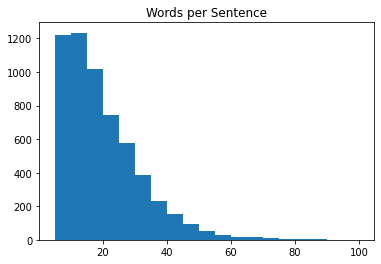

In [5]:
plt.hist(words_per_sentence, bins = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.title("Words per Sentence")
plt.show()

Using the dictionary "words_frequency" that we created at the beginning, we will sort it and get the 10 most common words in the text. With no surprise, the most common words are all stop words. Below you can see their frequency in the bar graph that was created. 

[('the', 5509), ('and', 2869), ('to', 2652), ('of', 2631), ('', 2608), ('i', 2597), ('a', 2592), ('in', 1727), ('that', 1640), ('it', 1462)]


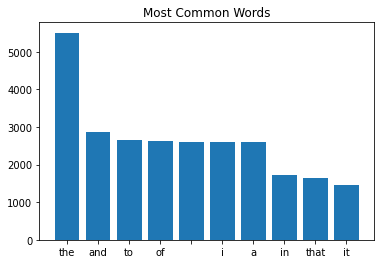

In [6]:
top_words = sorted(words_frequency.items(), key=lambda item: item[1], reverse=True)[:10]
word = []
frequency = []
print(top_words)
for i in top_words:
    word.append(i[0])
    frequency.append(i[1])
        
plt.bar(word, frequency)
plt.title("Most Common Words")
plt.show()
    